## Comparación - Kvara vs Leao vs Lozano

In [2]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
tiros = pd.read_csv("tiros.csv")
pases = pd.read_csv("pases.csv")
creacion = pd.read_csv("creacion.csv")
defensa = pd.read_csv("defensa.csv")
posesion = pd.read_csv("posesion.csv")

In [4]:
tiros = tiros.iloc[:,[0,3,4,5,6,12]]
pases = pases.iloc[:,[0,2,14,16,18,22]]
creacion_tiro = creacion.iloc[:,[1,9]]
dribles = posesion.iloc[:,[7,9,10]]

In [5]:
dribles.head()

,Dribles,Dribles.2,Dribles.3
Jugador,Con éxito,% de éxito,Errores de control
Khvicha Kvaratskhelia,19,29.2,29
Hirving Lozano,12,46.2,22
Rafael Leão,24,43.6,28


In [6]:
params = ["xG", "Goles", "Tiros 90", "xA", "Asistencias", "Pases progresivos", "ACG 90", "Dribles exitosos"]
"""
Expectativa - xG
Estándar - Goles
Estándar.4 - T/90
Cortos.2 - xA
Cortos - Asistencias
Largos.2 - Pases progresivos
ACG.1 - acciones de creacion de goles / 90
Dribles - Dribles con éxito
"""

low =  [0, 0, 0, 0, 0, 0, 0, 0]
high = [5, 10, 5, 5, 5, 50, 2.5, 30]

In [7]:
radar = Radar(params, low, high,
              #lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [8]:
tiros.head()
print(tiros["Expectativa"]["Khvicha Kvaratskhelia"])

3.5


In [9]:

kvara = [[tiros["Expectativa"]["Khvicha Kvaratskhelia"]],
         [tiros["Estándar"]["Khvicha Kvaratskhelia"]],
         [tiros["Estándar.4"]["Khvicha Kvaratskhelia"]],
         [pases["Cortos.2"]["Khvicha Kvaratskhelia"]],
         [pases["Cortos"]["Khvicha Kvaratskhelia"]],
         [pases["Largos.2"]["Khvicha Kvaratskhelia"]],
         [creacion_tiro["ACG.1"]["Khvicha Kvaratskhelia"]],
         [dribles["Dribles"]["Khvicha Kvaratskhelia"]]]

chucky = [[tiros["Expectativa"]["Hirving Lozano"]],
         [tiros["Estándar"]["Hirving Lozano"]],
         [tiros["Estándar.4"]["Hirving Lozano"]],
         [pases["Cortos.2"]["Hirving Lozano"]],
         [pases["Cortos"]["Hirving Lozano"]],
         [pases["Largos.2"]["Hirving Lozano"]],
         [creacion_tiro["ACG.1"]["Hirving Lozano"]],
         [dribles["Dribles"]["Hirving Lozano"]]]

leao = [[tiros["Expectativa"]["Rafael Leão"]],
         [tiros["Estándar"]["Rafael Leão"]],
         [tiros["Estándar.4"]["Rafael Leão"]],
         [pases["Cortos.2"]["Rafael Leão"]],
         [pases["Cortos"]["Rafael Leão"]],
         [pases["Largos.2"]["Rafael Leão"]],
         [creacion_tiro["ACG.1"]["Rafael Leão"]],
         [dribles["Dribles"]["Rafael Leão"]]]

print(kvara)

[['3.5'], ['6'], ['3.52'], ['3.3'], ['5'], ['18'], ['1.14'], ['19']]


In [10]:
kvara2 = []
for i in range(len(kvara)):
    kvara2.append(kvara[i][0])

Kvara = []
for j in range(len(kvara2)):
    k = float(kvara2[j])
    #print(type(Kvara[j]))
    Kvara.append(k)


In [11]:
chucky2 = []
for i in range(len(chucky)):
    chucky2.append(chucky[i][0])

Chucky = []
for j in range(len(chucky2)):
    k = float(chucky2[j])
    #print(type(Kvara[j]))
    Chucky.append(k)

#print(Chucky)

In [12]:
leao2 = []
for i in range(len(leao)):
    leao2.append(leao[i][0])

Leao = []
for j in range(len(leao2)):
    k = float(leao2[j])
    #print(type(Kvara[j]))
    Leao.append(k)

print(Leao)

[4.9, 6.0, 4.48, 2.7, 4.0, 42.0, 0.45, 24.0]


In [13]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [14]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid.grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'], facecolor='None')
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#28252c', edgecolor='#39353f', lw=1.5)
radar_output = radar.draw_radar(Kvara, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)

endnote_text = axs['endnote'].text(0.99, 0.5, 'ACG 90 : Acciones de creacion de goles por 90\nInspired By: StatsBomb / Rami Moghadam\nDatos de fbref\nGráfica de mplsoccer',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Khvicha Kvaratskhelia', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#e4dded')
title2_text = axs['title'].text(0.01, 0.25, 'Napoli', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#00ffff')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#e4dded')
title4_text = axs['title'].text(0.99, 0.25, 'Delantero', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#ff0000')

fig.set_facecolor('#121212')

plt.savefig("Kvaratskhelia.jpg")

AttributeError: 'function' object has no attribute 'grid'

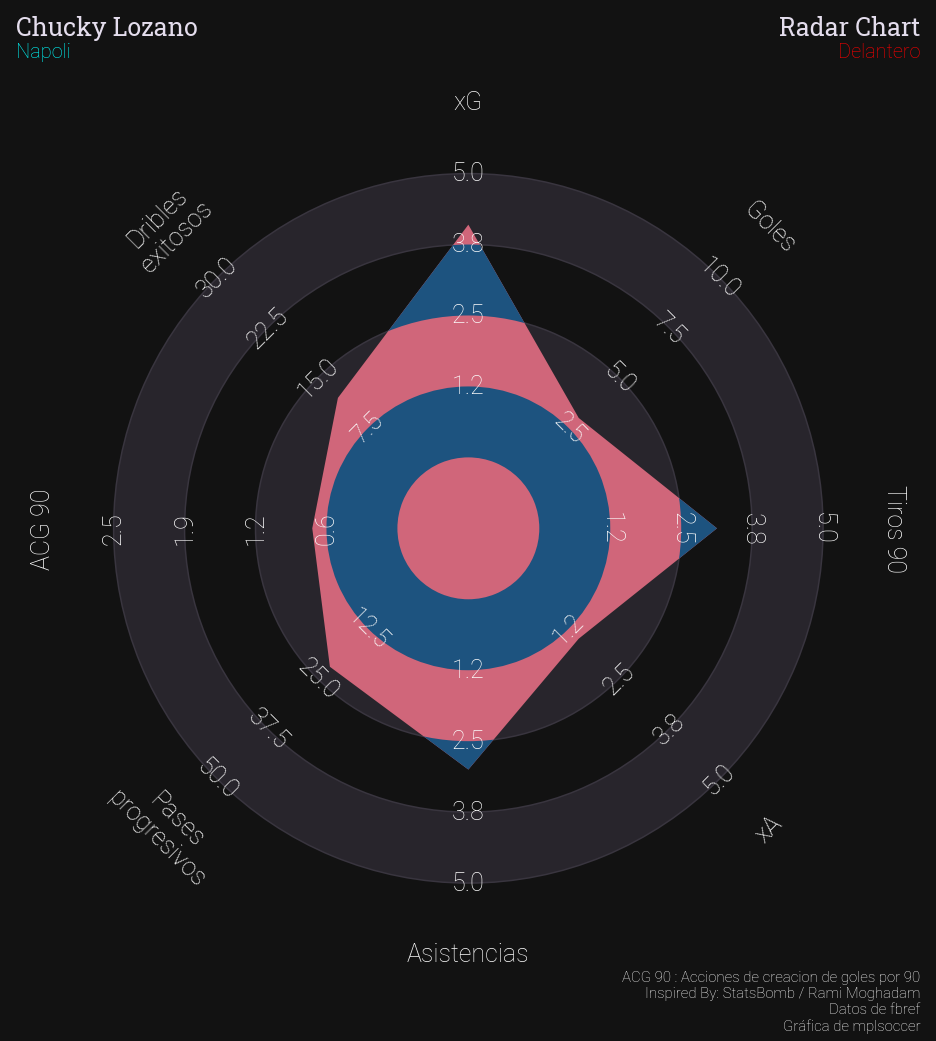

In [ ]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid.grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'], facecolor='None')
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#28252c', edgecolor='#39353f', lw=1.5)
radar_output = radar.draw_radar(Chucky, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)

endnote_text = axs['endnote'].text(0.99, 0.5, 'ACG 90 : Acciones de creacion de goles por 90\nInspired By: StatsBomb / Rami Moghadam\nDatos de fbref\nGráfica de mplsoccer',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Chucky Lozano', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#e4dded')
title2_text = axs['title'].text(0.01, 0.25, 'Napoli', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#00ffff')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#e4dded')
title4_text = axs['title'].text(0.99, 0.25, 'Delantero', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#ff0000')

fig.set_facecolor('#121212')

plt.savefig("Chucky.jpg")

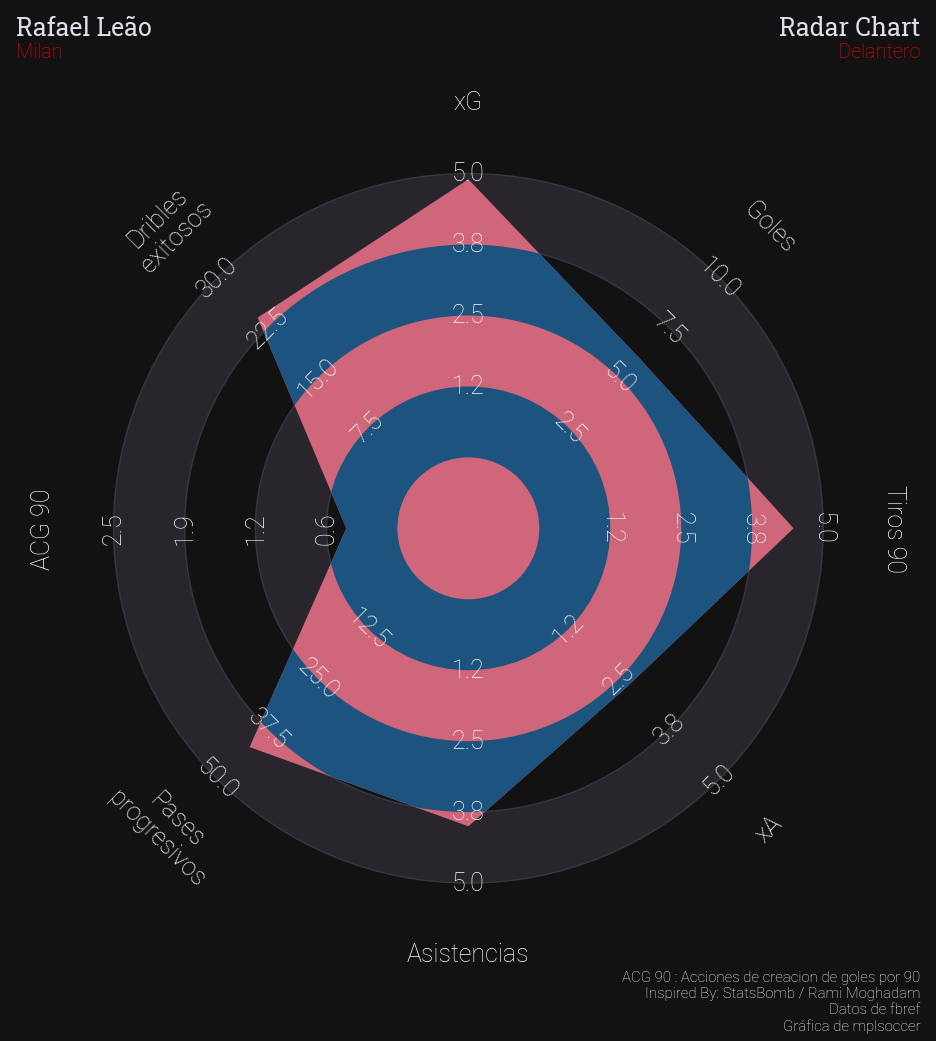

In [ ]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid.grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'], facecolor='None')
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#28252c', edgecolor='#39353f', lw=1.5)
radar_output = radar.draw_radar(Leao, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)

endnote_text = axs['endnote'].text(0.99, 0.5, 'ACG 90 : Acciones de creacion de goles por 90\nInspired By: StatsBomb / Rami Moghadam\nDatos de fbref\nGráfica de mplsoccer',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Rafael Leão', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#e4dded')
title2_text = axs['title'].text(0.01, 0.25, 'Milan', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#ff0000')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#e4dded')
title4_text = axs['title'].text(0.99, 0.25, 'Delantero', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#ff0000')

fig.set_facecolor('#121212')

plt.savefig("Leao.jpg")

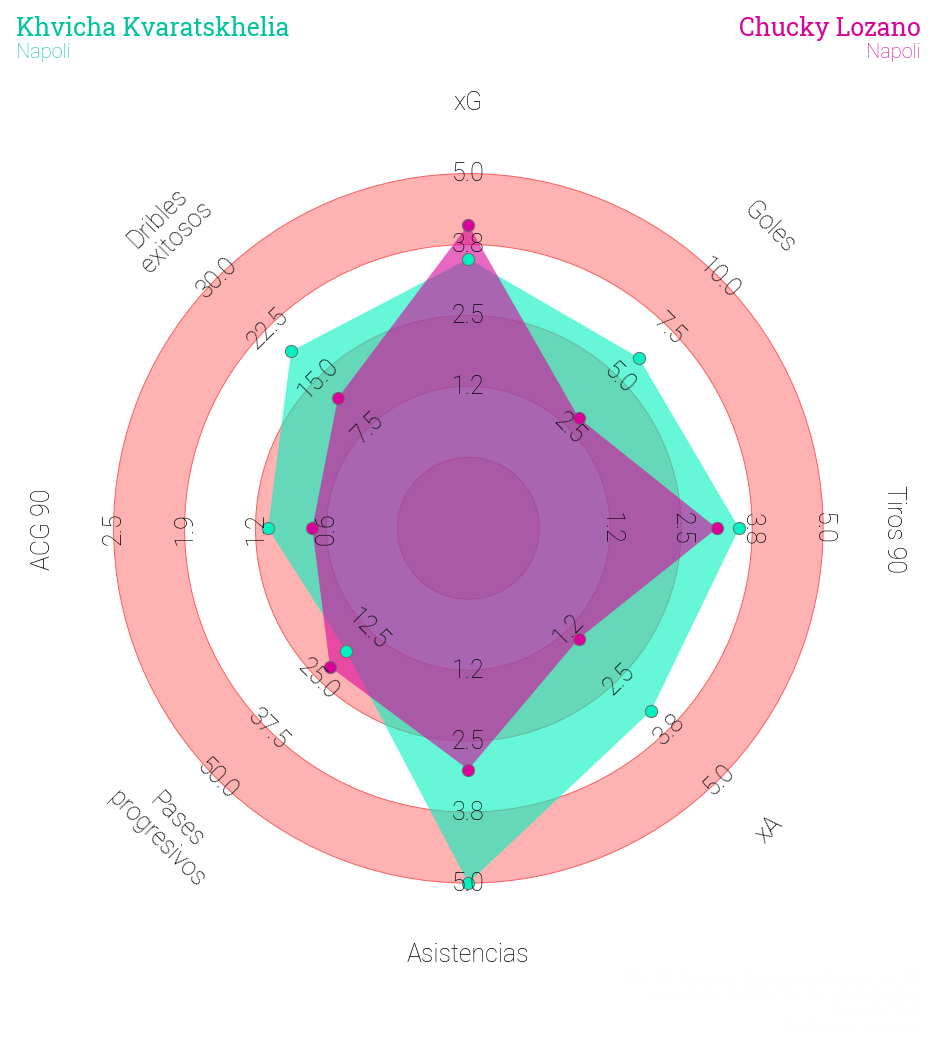

In [ ]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid.grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
               title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(Kvara, Chucky, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'ACG 90 : Acciones de creacion de goles por 90\nInspired By: StatsBomb / Rami Moghadam\nDatos de fbref\nGráfica de mplsoccer',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Khvicha Kvaratskhelia', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Napoli', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Chucky Lozano', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Napoli', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

plt.savefig("Kvara_Chucky.jpg")

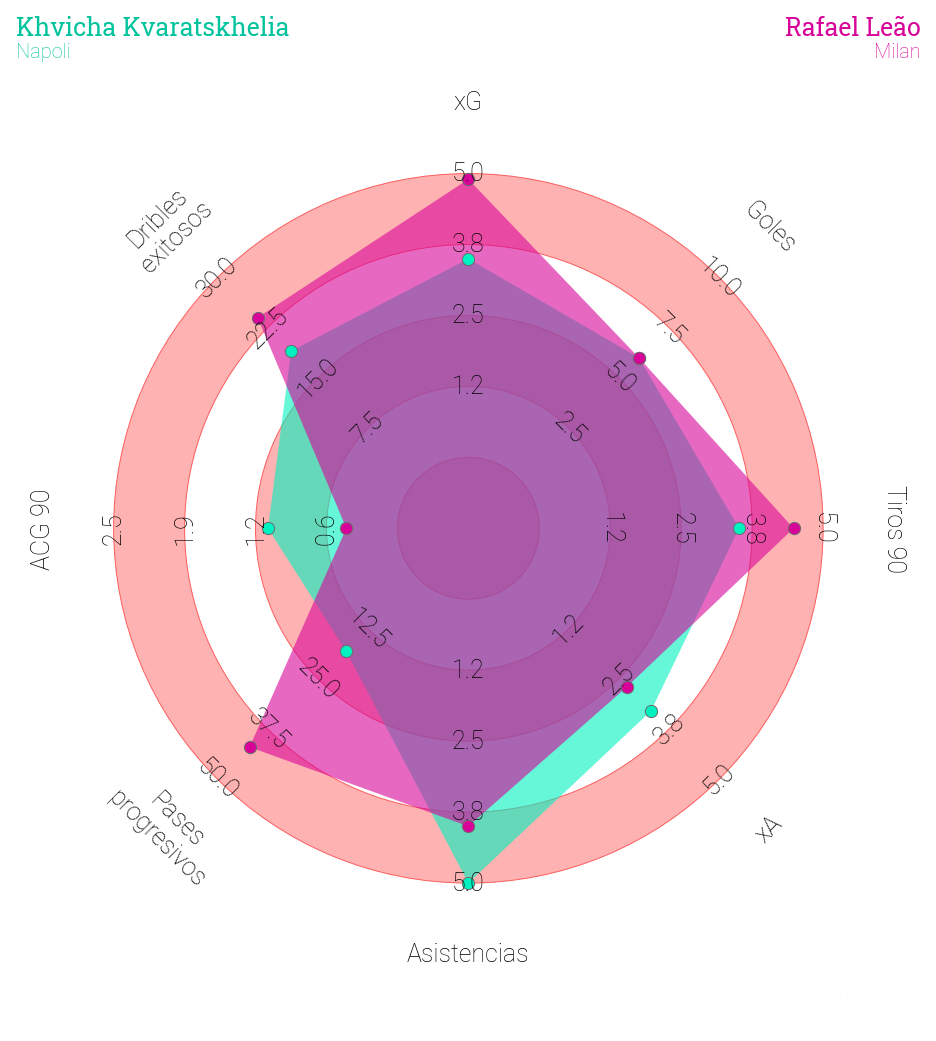

In [ ]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid.grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
               title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(Kvara, Leao, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'ACG 90 : Acciones de creacion de goles por 90\nInspired By: StatsBomb / Rami Moghadam\nDatos de fbref\nGráfica de mplsoccer',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Khvicha Kvaratskhelia', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Napoli', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Rafael Leão', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Milan', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

plt.savefig("Kvara_Leao.jpg")

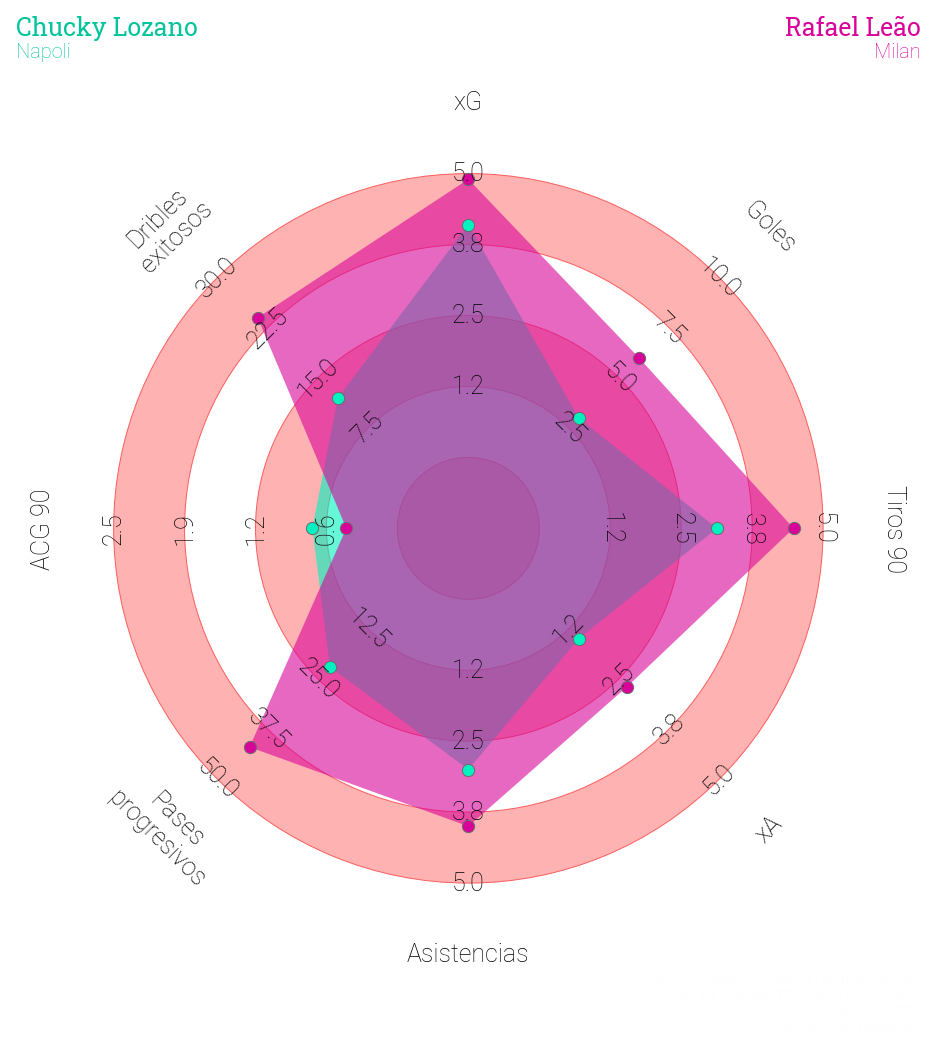

In [ ]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid.grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
               title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(Chucky, Leao, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'ACG 90 : Acciones de creacion de goles por 90\nInspired By: StatsBomb / Rami Moghadam\nDatos de fbref\nGráfica de mplsoccer',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Chucky Lozano', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Napoli', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Rafael Leão', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Milan', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

plt.savefig("Chucky_Leao.jpg")